In [1]:
import cv2
from PIL import Image
import glob
image_list = []
image_name=[]
for filename in glob.glob('tl_images/Green/*.jpg'): 
    #im=Image.open(filename)
    im=cv2.imread(filename)
    image_list.append(im)
    image_name.append(filename)

In [2]:
n_train = len(image_list)
print("The size of test set is ", n_train)

The size of test set is  15


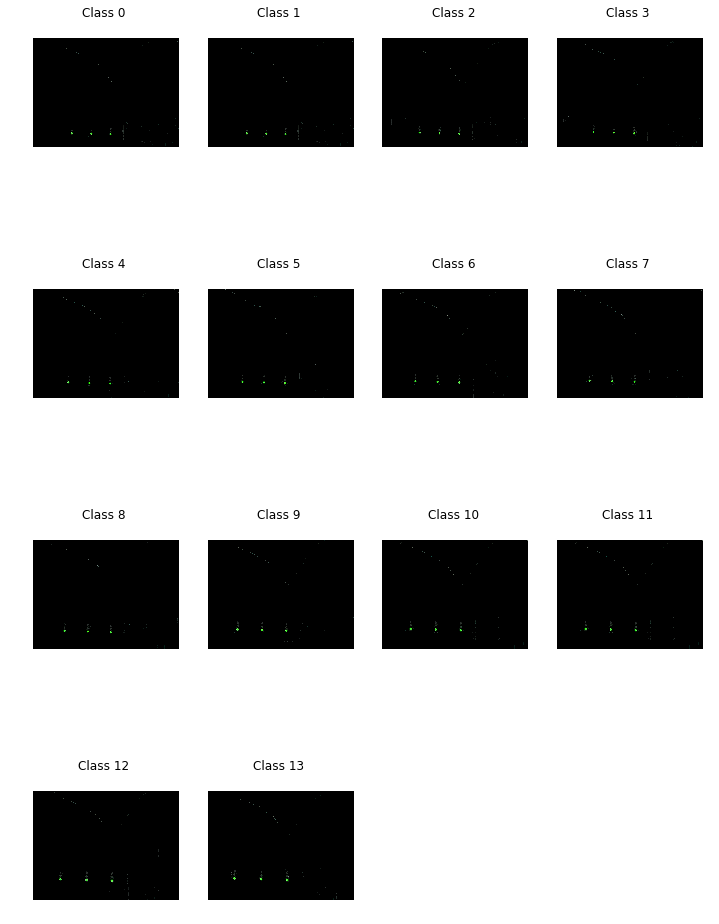

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

num_of_samples=[]
plt.figure(figsize=(12, 50))
for i in range(0, 14):
    plt.subplot(11, 4, i+1)
    #x_selected = X_train[y_train == i]
    img = cv2.imread(image_name[i])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

    ## slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    plt.imshow(green) 
    title="Class %s \n" % (i)
    plt.title(title)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()



In [4]:
image_list_red = []
image_name_red=[]
for filename in glob.glob('tl_images/Red/*.jpg'): 
    #im=Image.open(filename)
    im=cv2.imread(filename)
    image_list_red.append(im)
    image_name_red.append(filename)

In [5]:
n_train_red = len(image_list_red)
print("The size of test set is ", n_train_red)

The size of test set is  14


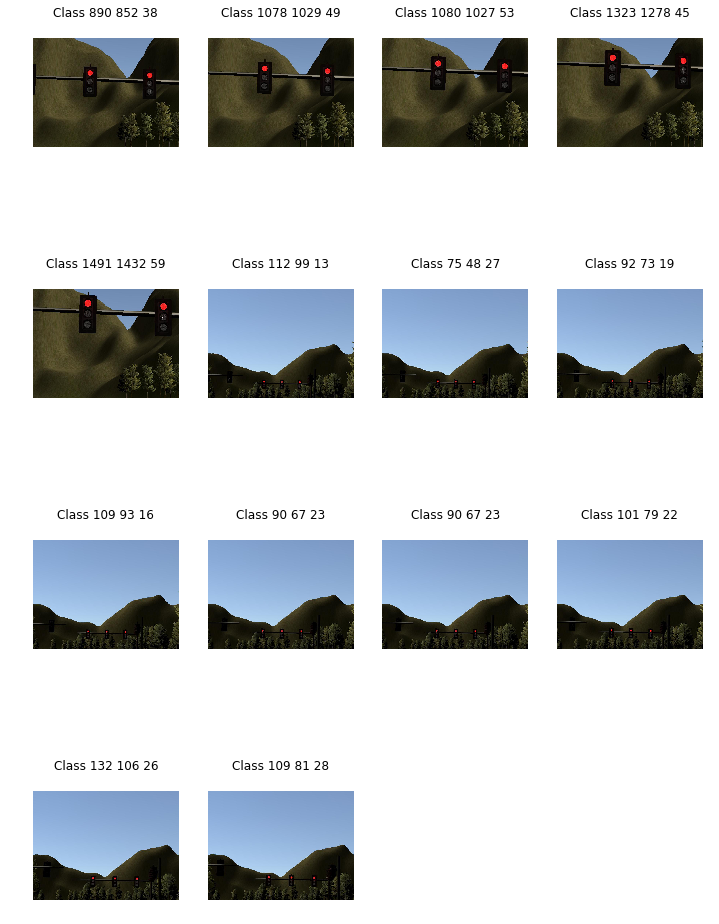

In [6]:

plt.figure(figsize=(12, 50))
for i in range(0, 14):
    plt.subplot(11, 4, i+1)
    #x_selected = X_train[y_train == i]
    img = cv2.imread(image_name_red[i],cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)       # get b,g,r
    
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    #hsv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # lower mask (0-10)
    #lower_red = np.array([0,50,50])
    lower_red = np.array([0,150,150])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)

    # upper mask (170-180)
    #lower_red = np.array([170,50,50])
    lower_red = np.array([160,150,150])
    upper_red = np.array([180,200,200])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1
    res = np.count_nonzero(mask)
    res0 = np.count_nonzero(mask0)
    res1 = np.count_nonzero(mask1)
    #print (res)
    ## slice the green
    imask = mask>0
    
    mask_red =cv2.inRange(r,240,255)
    
    red = np.zeros_like(img, np.uint8)
    red[imask] = rgb_img[imask]
    
    #plt.imshow(red) 
    plt.imshow(rgb_img) 
    title="Class %s %s %s\n" % (res,res0,res1)
    plt.title(title)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()